In [1]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

# We will display plots right inside Jupyter Notebook
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
import pandas as pd

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/kurochkinam/mlcourse.ai/master/data/video_games_sales.csv').dropna()
print(df.shape)

(6825, 16)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [5]:
df["Year_of_Release"]=df["Year_of_Release"].astype("int64")
df['User_Score'] = df['User_Score'].astype('float64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

In [6]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


In [7]:
from collections import Counter

In [8]:
Counter(df["Rating"]).items()

dict_items([('E', 2082), ('M', 1433), ('T', 2377), ('E10+', 930), ('AO', 1), ('K-A', 1), ('RP', 1)])

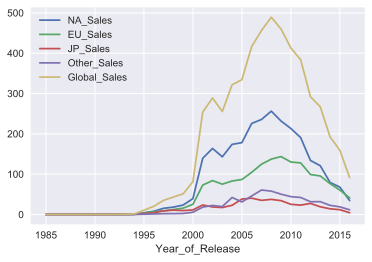

In [9]:
df[[x for x in df.columns if "Sales" in x]+["Year_of_Release"]].groupby("Year_of_Release").sum().plot()

In [10]:
df[[x for x in df.columns if "Sales" in x]+["Year_of_Release"]].head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_of_Release
0,41.36,28.96,3.77,8.45,82.53,2006
2,15.68,12.76,3.79,3.29,35.52,2008
3,15.61,10.93,3.28,2.95,32.77,2009
6,11.28,9.14,6.50,2.88,29.80,2006
7,13.96,9.18,2.93,2.84,28.92,2006


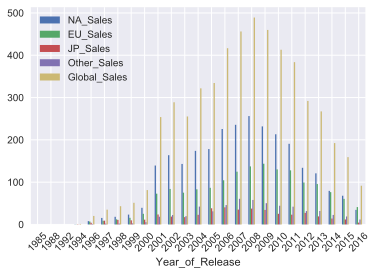

In [11]:
#rot - rotation of ticks at x axis

df[[x for x in df.columns if "Sales" in x]+["Year_of_Release"]].groupby("Year_of_Release").sum().plot(kind="bar", rot=45)

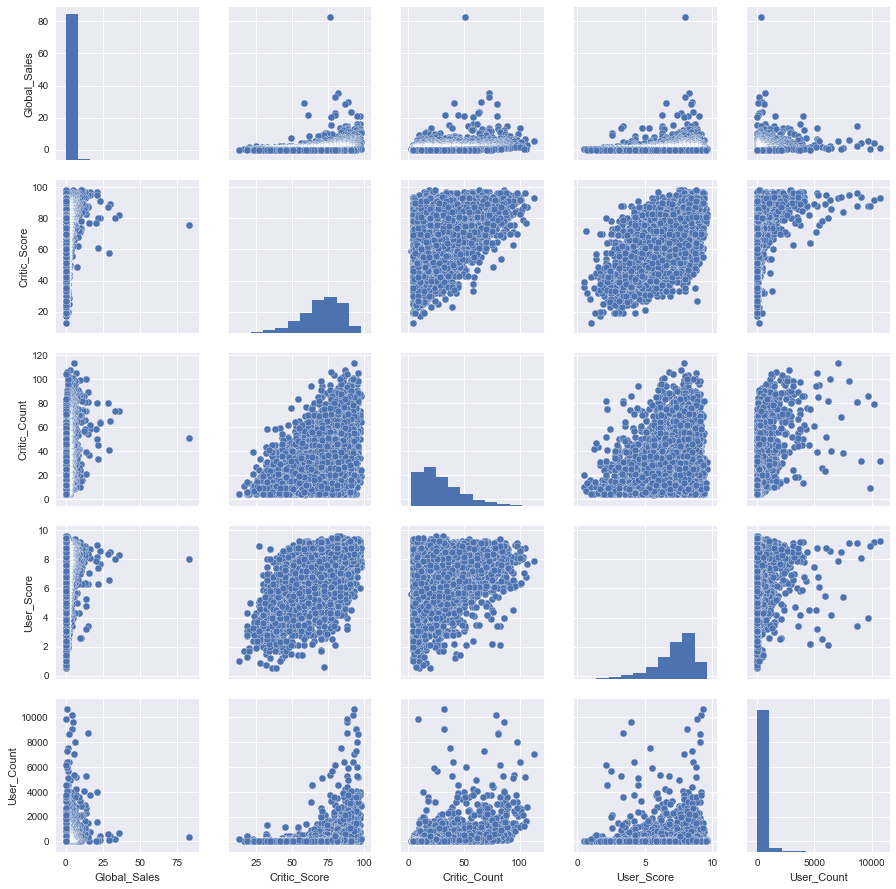

In [12]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);



C:\Users\KryvalapavaP\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


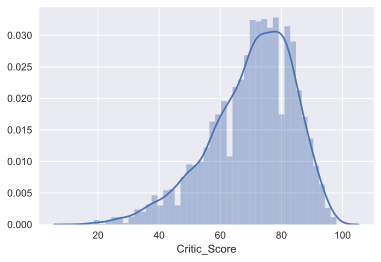

In [13]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df['Critic_Score'])

C:\Users\KryvalapavaP\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\KryvalapavaP\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


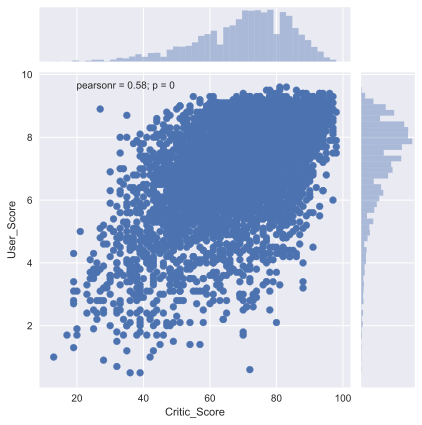

In [14]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

In [15]:
top_platforms=df.groupby("Platform")["Global_Sales"].agg(["sum"]).sort_values(by="sum", ascending=False).head(5).index.values

In [16]:
top_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype=object)

In [17]:
df["Platform"].value_counts().head(5).index.values

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

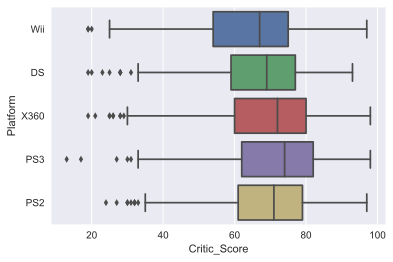

In [18]:
sns.boxplot(x="Critic_Score", data=df[df["Platform"].isin(top_platforms)], y="Platform", orient="h")



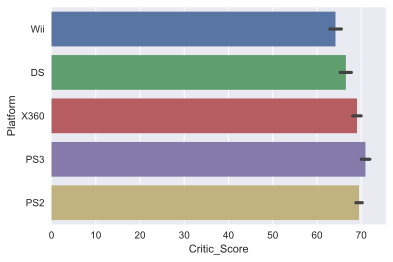

In [19]:
sns.barplot(x="Critic_Score", data=df[df["Platform"].isin(top_platforms)], y="Platform", orient="h")

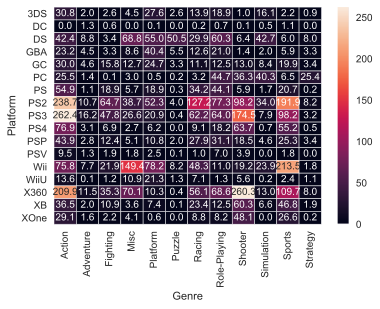

In [20]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5);

In [21]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [27]:
years_df=df.groupby("Year_of_Release")[["Global_Sales"]].sum().join(df.groupby("Year_of_Release")[["Name"]].count())
years_df.columns=['Global_Sales', 'Number_of_Games']

In [28]:
years_df.head()

,Global_Sales,Number_of_Games
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7


In [32]:
type(df.groupby("Year_of_Release")[["Global_Sales"]].sum())

pandas.core.frame.DataFrame

In [31]:
type(df.groupby("Year_of_Release")["Global_Sales"].sum())

pandas.core.series.Series

Figure is the main class and a work horse of visualization in plotly. It consists of the data (an array of lines called traces in this library) and the style (represented by the layout object). In the simplest case, you may call the iplot function to return only traces.

The show_link parameter toggles the visibility of the links leading to the online platform plot.ly in your charts. Most of the time, this functionality is not needed, so you may want to turn it off by passing show_link=False to prevent accidental clicks on those links.

In [37]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Global_Sales'],
    name='Global Sales'
)

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Number_of_Games'],
    name='Number of games released'
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {'title': 'Statistics for video games'}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [38]:
#As an option, you can save the plot in an html file:

plotly.offline.plot(fig, filename='years_stats.html', show_link=False);

In [39]:
# Do calculations and prepare the dataset
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [40]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Global_Sales'],
    name='Global Sales'
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Number_of_Games'],
    name='Number of games released'
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {'title': 'Market share by gaming platform'}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [41]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )
    
# Visualize
iplot(data, show_link=False)